# **Lecture4 homework**

Name: Shuai Wu

Stuent ID: 24S054016

# Question1
Re-analyse the annual maximum gust wind speeds for (I) the years 1952 to 1998, (II) the years 1952 to 1997, i.e. ignore the high value recorded in 1998. Compare the resulting predictions of design wind speeds for (a) 50 years return period, and (b) 1000 years return period, and comment.
# Question2 
Using the parameter estimation approach in code GB 50009 2012, predict the 10, 20, 50, 100, 200, 500, 1000 years return period design wind speeds for the above two cases, and compare the results with the Gumbel approach.


In [64]:
# 导入必要的库，pandas用于数据处理
import pandas as pd
from io import StringIO # python3中StringIO的位置

# 加载数据
data = """
year,Wind speed m/s
1952,31.4
1953,33.4
1954,29.8
1955,30.3
1956,27.8
1957,30.3
1958,29.3
1959,36.5
1960,29.3
1961,27.3
1962,31.9
1963,28.8
1964,25.2
1965,27.3
1966,23.7
1967,27.8
1968,32.4
1969,27.8
1970,26.2
1971,30.9
1972,31.9
1973,27.3
1974,25.7
1975,32.9
1976,28.3
1977,27.3
1978,28.3
1979,28.3
1980,29.3
1981,27.8
1982,27.8
1983,30.9
1984,26.7
1985,30.3
1986,28.3
1987,30.3
1988,34
1989,28.8
1990,30.3
1991,27.3
1992,27.8
1993,28.8
1994,30.9
1995,26.2
1996,25.7
1997,24.7
1998,42.2
"""

# 将data数据转换为StringIO对象，再读取为DataFrame
df = pd.read_csv(StringIO(data)) 


# Answer



拟合方程表达式 (U = α × y + μ)
方法        数据范围           斜率(α)     截距(μ)     表达式
--------------------------------------------------
Gumbel    1952-1998      2.6590    27.8108   U = 2.6590 × y + 27.8108
Gumbel    1952-1997      2.1923    27.7861   U = 2.1923 × y + 27.7861
Gringorten1952-1998      2.5127    27.8399   U = 2.5127 × y + 27.8399
Gringorten1952-1997      2.0498    27.8218   U = 2.0498 × y + 27.8218

设计风速计算结果 (m/s)
方法        数据范围           50年重现期         1000年重现期       
------------------------------------------------------------
Gumbel    1952-1998      38.19          46.18          
Gumbel    1952-1997      36.34          42.93          
Gringorten1952-1998      37.64          45.20          
Gringorten1952-1997      35.82          41.98          


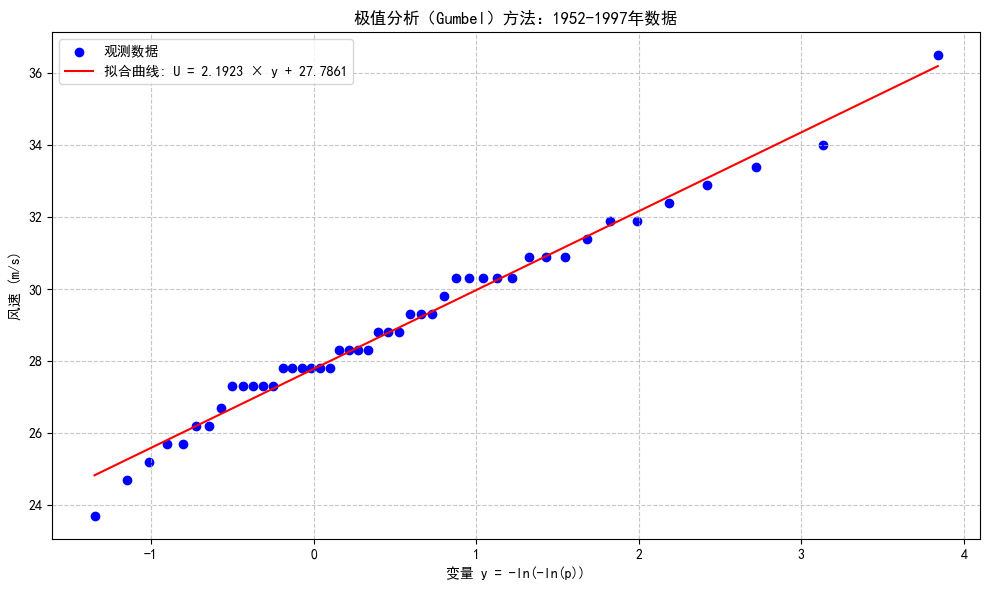

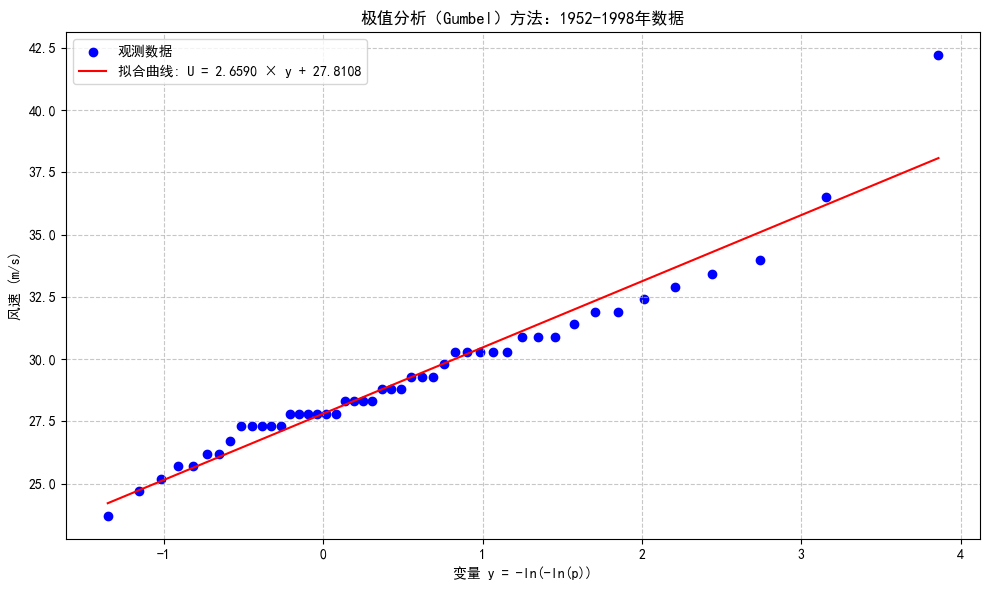

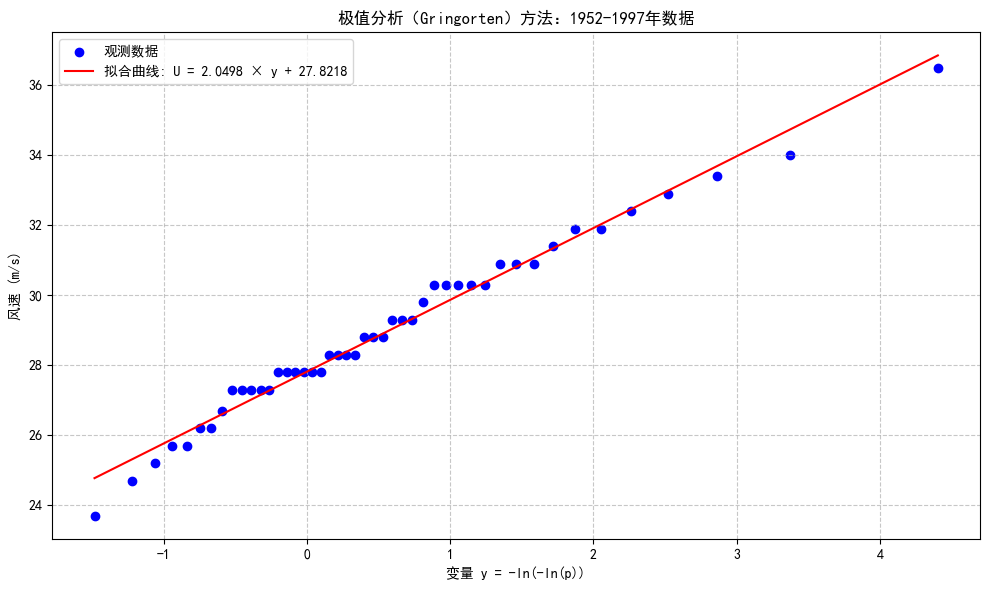

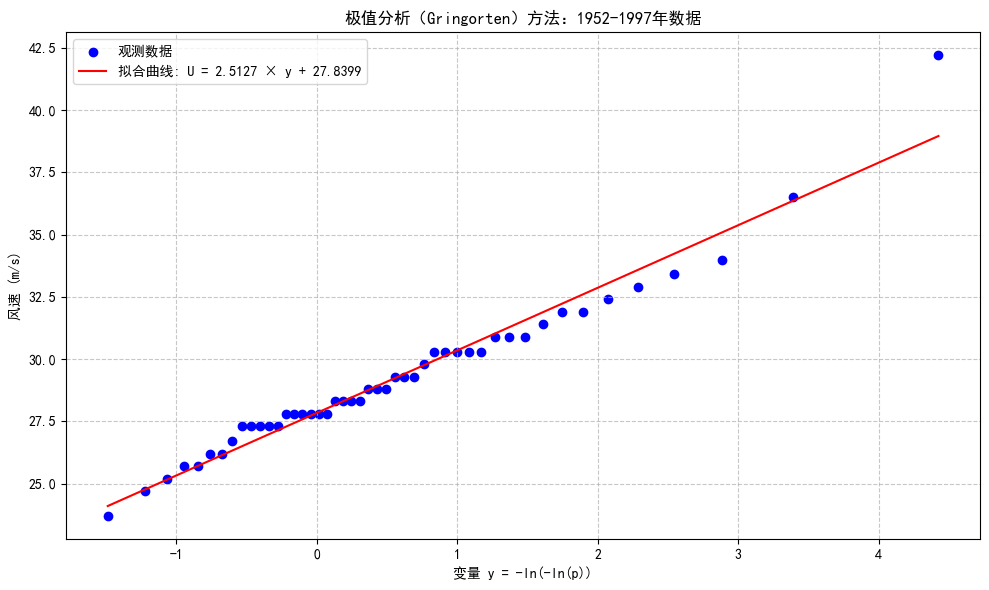

GB 50009方法计算的设计风速 (m/s)
重现期(年)         1952-1998数据    1952-1997数据    差值
------------------------------------------------------------
10             35.17          33.75          1.42
20             36.62          34.92          1.70
50             38.50          36.43          2.07
100            39.97          37.62          2.35
200            41.55          38.89          2.66
500            43.59          40.54          3.05
1000           45.22          41.85          3.37


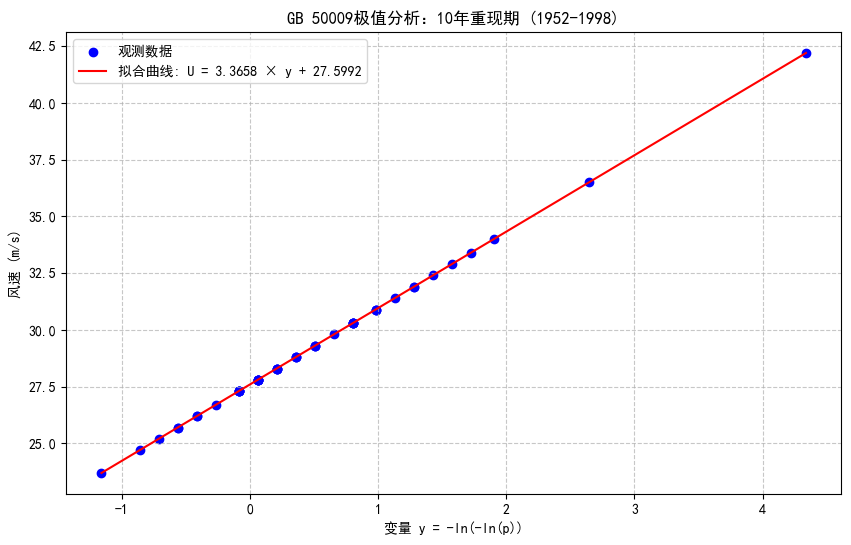

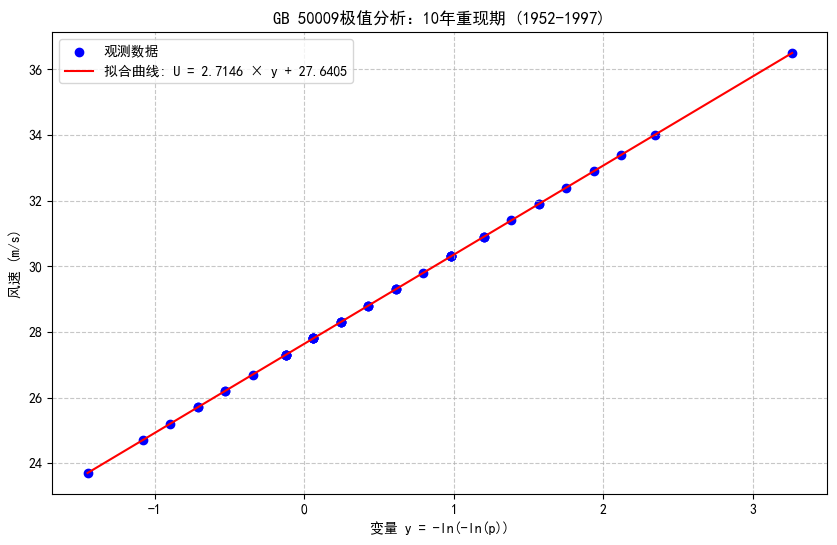

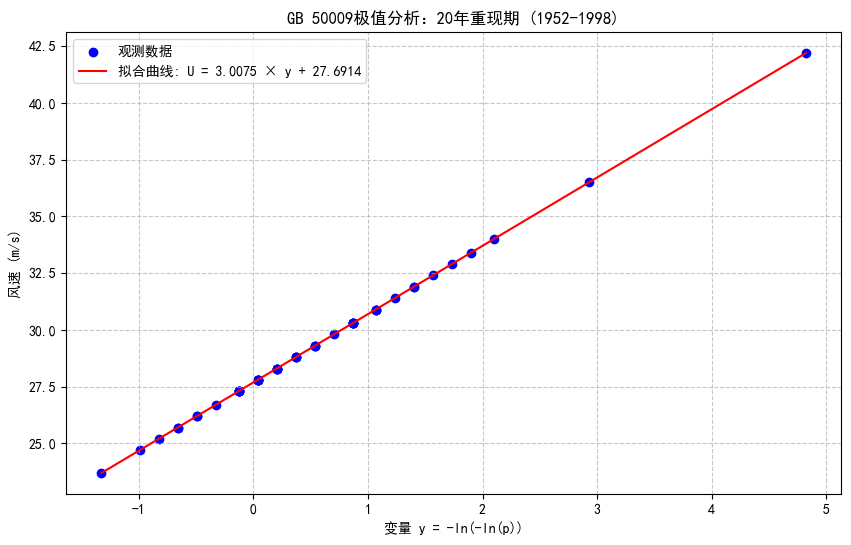

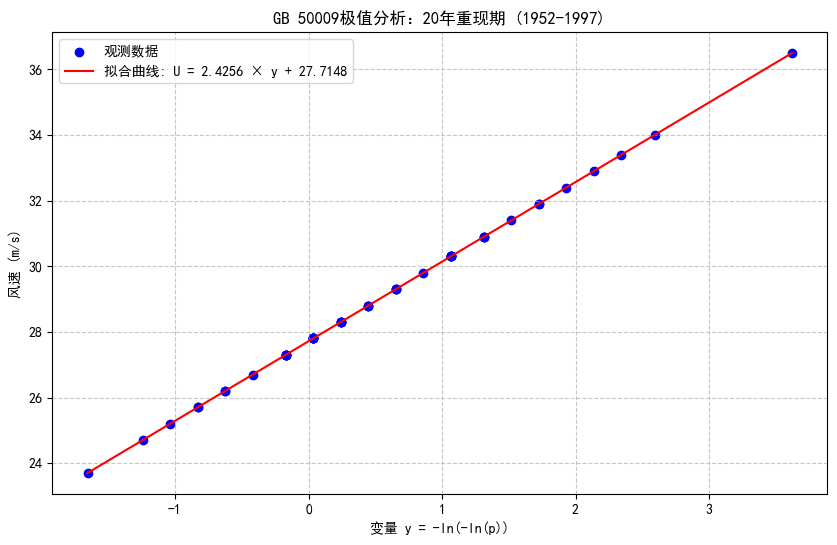

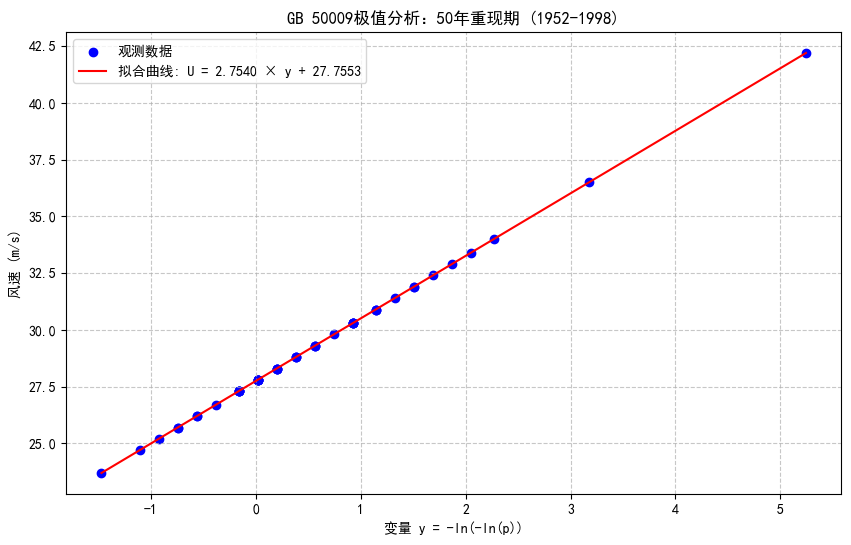

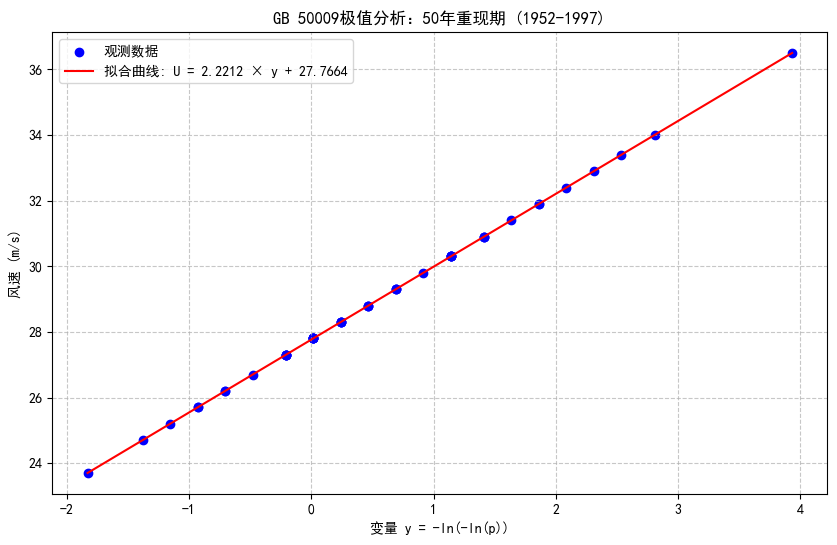

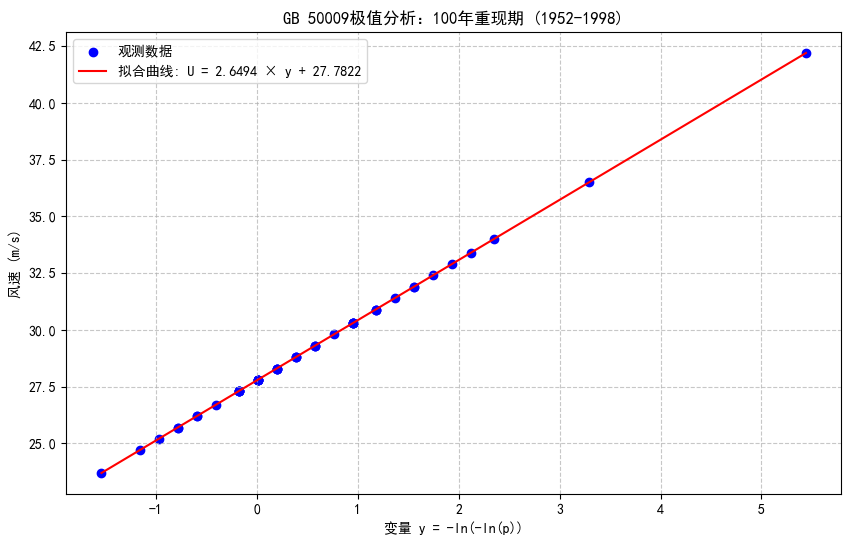

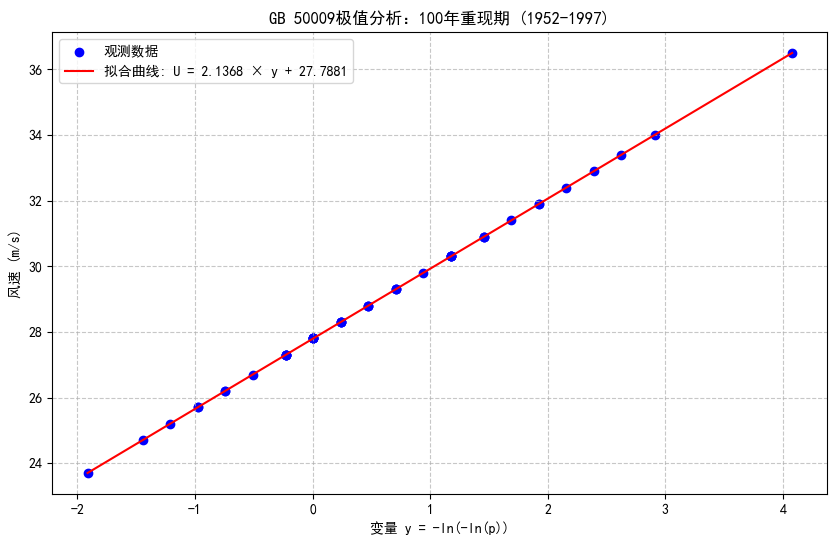

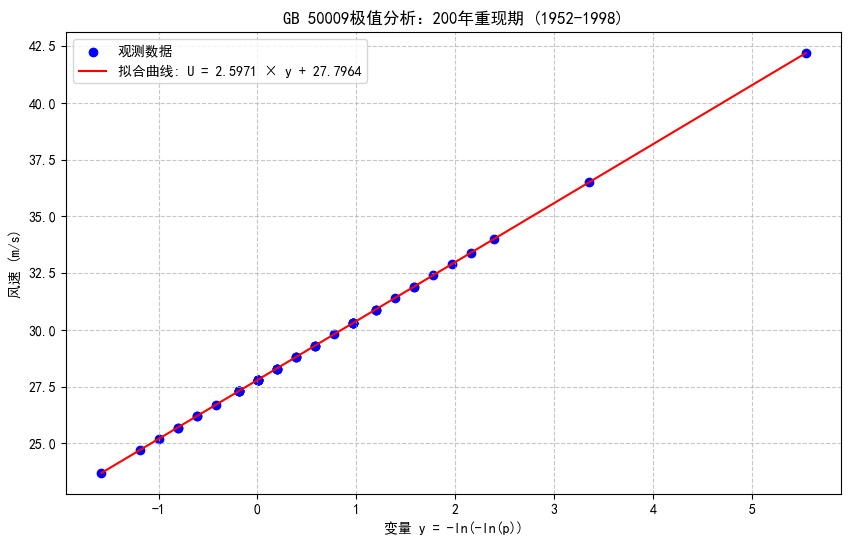

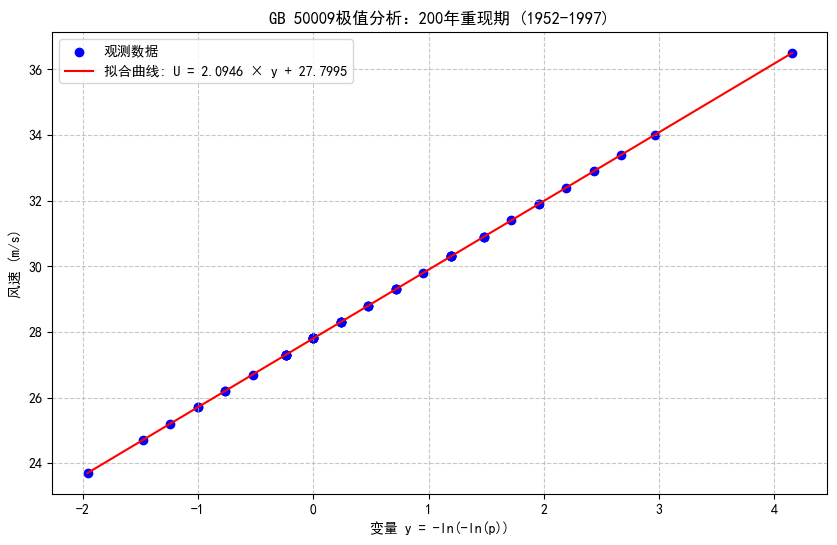

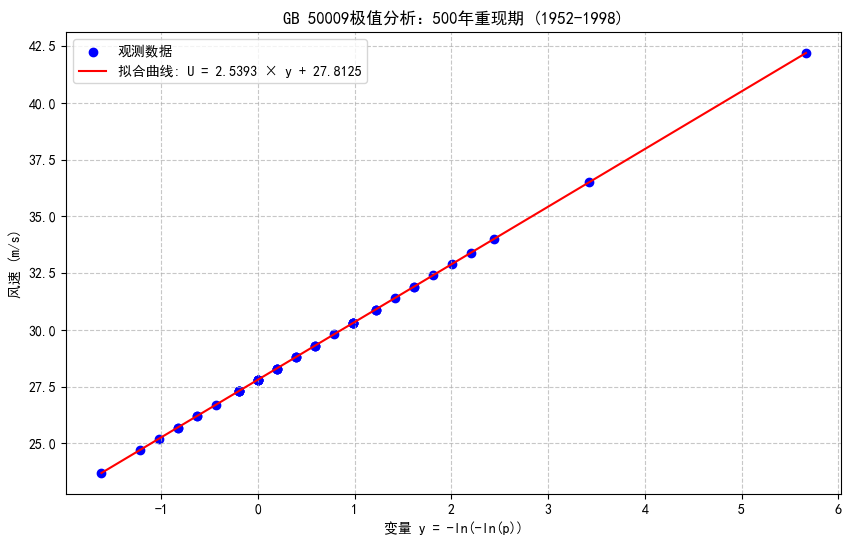

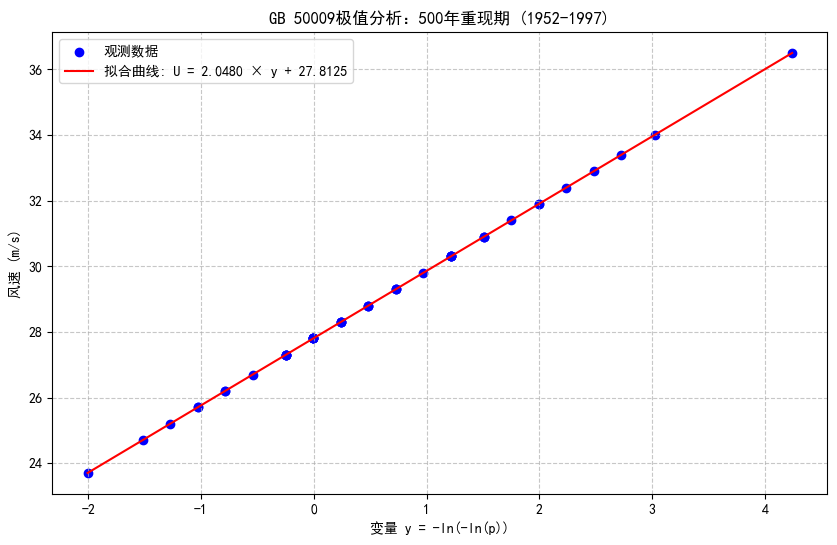

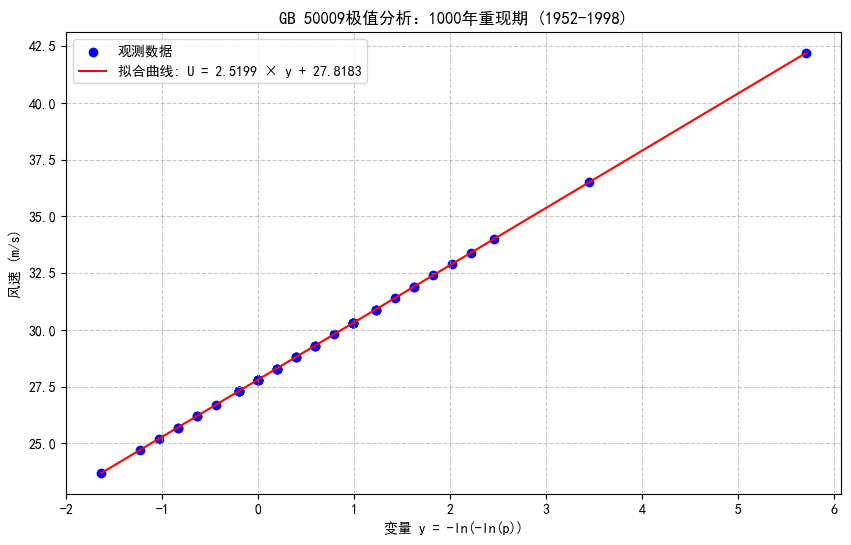

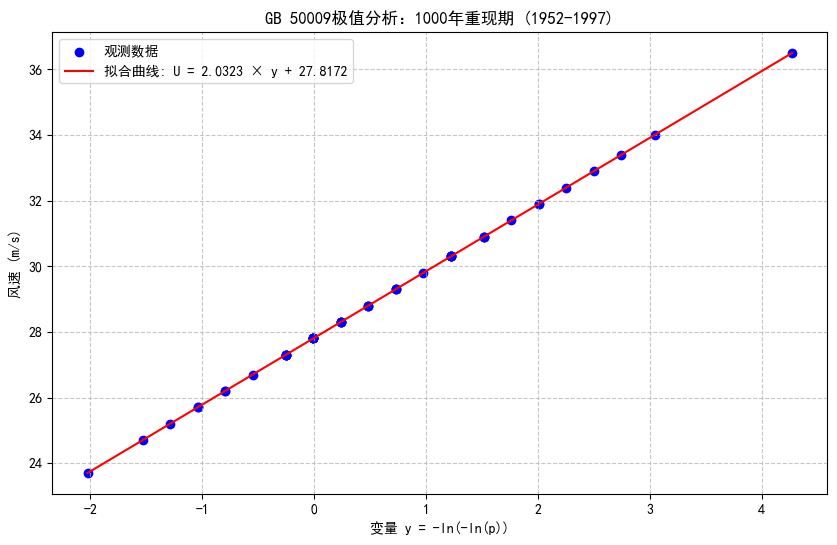

(<function __main__.gb50009_fit.<locals>.<lambda>(y)>,
 array([[-2.02586353e+00,  2.37000000e+01],
        [-1.53381613e+00,  2.47000000e+01],
        [-1.28779243e+00,  2.52000000e+01],
        [-1.04176874e+00,  2.57000000e+01],
        [-1.04176874e+00,  2.57000000e+01],
        [-7.95745037e-01,  2.62000000e+01],
        [-7.95745037e-01,  2.62000000e+01],
        [-5.49721338e-01,  2.67000000e+01],
        [-2.54492899e-01,  2.73000000e+01],
        [-2.54492899e-01,  2.73000000e+01],
        [-2.54492899e-01,  2.73000000e+01],
        [-2.54492899e-01,  2.73000000e+01],
        [-2.54492899e-01,  2.73000000e+01],
        [-8.46919992e-03,  2.78000000e+01],
        [-8.46919992e-03,  2.78000000e+01],
        [-8.46919992e-03,  2.78000000e+01],
        [-8.46919992e-03,  2.78000000e+01],
        [-8.46919992e-03,  2.78000000e+01],
        [-8.46919992e-03,  2.78000000e+01],
        [ 2.37554499e-01,  2.83000000e+01],
        [ 2.37554499e-01,  2.83000000e+01],
        [ 2.37554499e

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# 设置中文字体和负号显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 按照风速从小到大排序
df_98 = df.sort_values(by='Wind speed m/s')
df_97 = df_98.head(len(df)-1).sort_values(by='Wind speed m/s')
# print("Wind speeds sorted in ascending order:")
# print('97:',df_97)

def gumbel_fit(df_wind):
    """
    对风速数据进行Gumbel分布拟合分析

    参数:
        df_wind (pandas.DataFrame): 包含'Wind speed m/s'列的DataFrame，应已按风速升序排列

    返回:
        tuple: (拟合函数, 数据矩阵, 斜率, 截距)
    """
    import numpy as np

    N = len(df_wind)  # 总的行数
    data = np.zeros((N, 2))   # 创建一个N行2列的零矩阵

    # 填充矩阵
    for m in range(1, N+1):
        p = m / (1 + N)        # 计算p值
        y = -np.log(-np.log(p))  # 计算约化变量y值
        data[m-1, 0] = y       # 第一列为y值
        data[m-1, 1] = df_wind.iloc[m-1]['Wind speed m/s']  # 第二列为对应的风速值

    # 最小二乘法计算斜率和截距
    slope, intercept = np.polyfit(data[:, 0], data[:, 1], 1)

    # 计算线性拟合方程
    fitted_line = lambda y: slope * y + intercept

    return fitted_line, data, slope, intercept

def gringorten_fit(df_wind):
    """
    对风速数据进行gringorten分布拟合分析

    参数:
        df_wind (pandas.DataFrame): 包含'Wind speed m/s'列的DataFrame，应已按风速升序排列

    返回:
        tuple: (拟合函数, 数据矩阵, 斜率, 截距)
    """
    import numpy as np

    N = len(df_wind)          # 总的行数
    data = np.zeros((N, 2))   # 创建一个N行2列的零矩阵

    # 填充矩阵
    for m in range(1, N+1):
        p = (m - 0.44) / (0.12 + N)        # 计算p值
        y = -np.log(-np.log(p))  # 计算约化变量y值
        data[m-1, 0] = y         # 第一列为y值
        data[m-1, 1] = df_wind.iloc[m-1]['Wind speed m/s']  # 第二列为对应的风速值

    # 最小二乘法计算斜率和截距
    slope, intercept = np.polyfit(data[:, 0], data[:, 1], 1)

    # 计算线性拟合方程
    fitted_line = lambda y: slope * y + intercept

    return fitted_line, data, slope, intercept

# 使用函数进行Gumbel拟合
fitted_line_Gu98, data_Gu98, alpha_Gu98, mu_Gu98 = gumbel_fit(df_98)
fitted_line_Gu97, data_Gu97, alpha_Gu97, mu_Gu97 = gumbel_fit(df_97)
# 使用函数进行Gumbel拟合
fitted_line_Gr98, data_Gr98, alpha_Gr98, mu_Gr98 = gringorten_fit(df_98)
fitted_line_Gr97, data_Gr97, alpha_Gr97, mu_Gr97 = gringorten_fit(df_97)
# 计算50年重现期和1000年重现期
y_50 = -np.log(-np.log(1 - 1/50))
y_1000 = -np.log(-np.log(1 - 1/1000))

UR_50_Gu98 = fitted_line_Gu98(y_50)
UR_50_Gu97 = fitted_line_Gu97(y_50)
UR_50_Gr98 = fitted_line_Gr98(y_50)
UR_50_Gr97 = fitted_line_Gr97(y_50)
UR_1000_Gu98 = fitted_line_Gu98(y_1000)
UR_1000_Gu97 = fitted_line_Gu97(y_1000)
UR_1000_Gr98 = fitted_line_Gr98(y_1000)
UR_1000_Gr97 = fitted_line_Gr97(y_1000)

# 打印函数表达式
# 拟合表达式输出
print("\n" + "="*50)
print("拟合方程表达式 (U = α × y + μ)")
print("="*50)
print(f"{'方法':<10}{'数据范围':<15}{'斜率(α)':<10}{'截距(μ)':<10}{'表达式'}")
print("-"*50)
print(f"{'Gumbel':<10}{'1952-1998':<15}{alpha_Gu98:<10.4f}{mu_Gu98:<10.4f}U = {alpha_Gu98:.4f} × y + {mu_Gu98:.4f}")
print(f"{'Gumbel':<10}{'1952-1997':<15}{alpha_Gu97:<10.4f}{mu_Gu97:<10.4f}U = {alpha_Gu97:.4f} × y + {mu_Gu97:.4f}")
print(f"{'Gringorten':<10}{'1952-1998':<15}{alpha_Gr98:<10.4f}{mu_Gr98:<10.4f}U = {alpha_Gr98:.4f} × y + {mu_Gr98:.4f}")
print(f"{'Gringorten':<10}{'1952-1997':<15}{alpha_Gr97:<10.4f}{mu_Gr97:<10.4f}U = {alpha_Gr97:.4f} × y + {mu_Gr97:.4f}")

# 设计风速结果输出
print("\n" + "="*60)
print("设计风速计算结果 (m/s)")
print("="*60)
print(f"{'方法':<10}{'数据范围':<15}{'50年重现期':<15}{'1000年重现期':<15}")
print("-"*60)
print(f"{'Gumbel':<10}{'1952-1998':<15}{UR_50_Gu98:<15.2f}{UR_1000_Gu98:<15.2f}")
print(f"{'Gumbel':<10}{'1952-1997':<15}{UR_50_Gu97:<15.2f}{UR_1000_Gu97:<15.2f}")
print(f"{'Gringorten':<10}{'1952-1998':<15}{UR_50_Gr98:<15.2f}{UR_1000_Gr98:<15.2f}")
print(f"{'Gringorten':<10}{'1952-1997':<15}{UR_50_Gr97:<15.2f}{UR_1000_Gr97:<15.2f}")


# 绘制曲线
def plot_extreme_value_analysis(data, fitted_line, alpha, mu, title):
    """
    绘制极值分析图，包括散点图和拟合曲线

    参数:
        data (numpy.ndarray): 包含约化变量和风速的二维数组
        fitted_line (function): 拟合函数
        alpha (float): 斜率参数
        mu (float): 截距参数
        title (str): 图表标题
    """
    import matplotlib.pyplot as plt
    import numpy as np

    # 创建散点图
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], color='blue', marker='o', label='观测数据')

    # 为拟合线创建平滑的x值序列
    x_values = np.linspace(min(data[:, 0]), max(data[:, 0]), 100)
    # 计算对应的y值
    y_values = [fitted_line(x) for x in x_values]

    # 绘制拟合线
    plt.plot(x_values, y_values, color='red', linestyle='-',
             label=f'拟合曲线: U = {alpha:.4f} × y + {mu:.4f}')

    # 添加标题和标签
    plt.title(title)
    plt.xlabel('变量 y = -ln(-ln(p))')
    plt.ylabel('风速 (m/s)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()

    # 显示图形
    plt.tight_layout()
    plt.show()

# Gumbel方法:1952-1997数据&1952-1998数据
plot_extreme_value_analysis(data_Gu97, fitted_line_Gu97, alpha_Gu97, mu_Gu97,
                           "极值分析（Gumbel）方法：1952-1997年数据")
plot_extreme_value_analysis(data_Gu98, fitted_line_Gu98, alpha_Gu98, mu_Gu98,
                           "极值分析（Gumbel）方法：1952-1998年数据")
# Gringorten方法:1952-1997数据&1952-1998数据
plot_extreme_value_analysis(data_Gr97, fitted_line_Gr97, alpha_Gr97, mu_Gr97,
                           "极值分析（Gringorten）方法：1952-1997年数据")
plot_extreme_value_analysis(data_Gr98, fitted_line_Gr98, alpha_Gr98, mu_Gr98,
                           "极值分析（Gringorten）方法：1952-1997年数据")

# GB 50009 规范计算

# 导入C1，C2
C1C2_data = """
n,C1,C2
10,0.9497,0.4952
20,1.06283,0.52355
50,1.16066,0.54853
100,1.20649,0.56002
200,1.23078,0.56586
500,1.2588,0.57240
1000,1.26851,0.57450
"""
# 将data数据转换为StringIO对象，再读取为DataFrame
C1C2 = pd.read_csv(StringIO(C1C2_data))

# 1. 定义计算方法
def gb50009_fit(df_wind, C1C2, n):
    """
    根据GB 50009规范方法对风速数据进行极值分布拟合分析

    参数:
        df_wind (pandas.DataFrame): 包含'Wind speed m/s'列的DataFrame
        C1C2 (pandas.DataFrame): 包含不同重现期对应的C1、C2值的DataFrame
        n (int): 重现期（年）

    返回:
        tuple: (拟合函数, 数据矩阵, 斜率, 截距)
    """
    import numpy as np

    # 直接计算风速数据的标准差和平均值
    std_dev = df_wind['Wind speed m/s'].std(ddof=1)
    mean_val = df_wind['Wind speed m/s'].mean()

    # 从C1C2中提取对应重现期的系数
    row = C1C2[C1C2['n'] == n]
    if len(row) == 0:
        raise ValueError(f"在C1C2表中找不到重现期为{n}年的数据")

    C1 = row['C1'].values[0]
    C2 = row['C2'].values[0]

    # 计算α和μ
    alpha = C1 / std_dev
    mu = mean_val - C2 / alpha

    N = len(df_wind)
    data = np.zeros((N, 2))

    # 计算每个风速值对应的p值和y值
    for i in range(N):
        x = df_wind.iloc[i]['Wind speed m/s']
        p = np.exp(-np.exp(-alpha * (x - mu)))
        y = -np.log(-np.log(p))

        data[i, 0] = y
        data[i, 1] = x

    # 最小二乘法计算斜率和截距
    slope, intercept = np.polyfit(data[:, 0], data[:, 1], 1)

    # 计算线性拟合方程
    fitted_line = lambda y: slope * y + intercept

    return fitted_line, data, slope, intercept

# 2. 分析不同重现期的结果
return_periods = [10, 20, 50, 100, 200, 500, 1000]
results_98 = {}
results_97 = {}

for n in return_periods:
    # 使用包含1998年数据的分析
    fitted_line_98, data_98, slope_98, intercept_98 = gb50009_fit(df_98, C1C2, n)
    results_98[n] = fitted_line_98(-np.log(-np.log(1-1/n)))

    # 使用不包含1998年数据的分析
    fitted_line_97, data_97, slope_97, intercept_97 = gb50009_fit(df_97, C1C2, n)
    results_97[n] = fitted_line_97(-np.log(-np.log(1-1/n)))

# 3. 展示结果
print("GB 50009方法计算的设计风速 (m/s)")
print("="*60)
print(f"{'重现期(年)':<15}{'1952-1998数据':<15}{'1952-1997数据':<15}{'差值'}")
print("-"*60)

for n in return_periods:
    diff = results_98[n] - results_97[n]
    print(f"{n:<15}{results_98[n]:<15.2f}{results_97[n]:<15.2f}{diff:.2f}")

# 4. 绘制图形
def plot_gb50009_analysis(df_wind, C1C2, return_period, data_range_label):
    """
    绘制GB 50009方法下的极值分析图，包括散点图和拟合曲线

    参数:
        df_wind (pandas.DataFrame): 包含'Wind speed m/s'列的DataFrame
        C1C2 (pandas.DataFrame): 包含不同重现期对应的C1、C2值的DataFrame
        return_period (int): 重现期（年）
        data_range_label (str): 数据范围标签，如 "1952-1998"

    返回:
        tuple: (拟合函数, 数据矩阵, 斜率, 截距)
    """
    # 使用gb50009_fit函数进行拟合
    fitted_line, data, slope, intercept = gb50009_fit(df_wind, C1C2, return_period)

    # 创建图形
    plt.figure(figsize=(10, 6))

    # 绘制散点图
    plt.scatter(data[:, 0], data[:, 1], color='blue', marker='o', label='观测数据')

    # 为拟合线创建平滑的x值序列
    x_values = np.linspace(min(data[:, 0]), max(data[:, 0]), 100)
    # 计算对应的y值
    y_values = [fitted_line(x) for x in x_values]

    # 绘制拟合线
    plt.plot(x_values, y_values, color='red', linestyle='-',
             label=f'拟合曲线: U = {slope:.4f} × y + {intercept:.4f}')

    # 添加标题和标签
    plt.title(f"GB 50009极值分析：{return_period}年重现期 ({data_range_label})")
    plt.xlabel('变量 y = -ln(-ln(p))')
    plt.ylabel('风速 (m/s)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()

    # 显示图形
    plt.show()

    return fitted_line, data, slope, intercept

# 绘制R年重现期数据
plot_gb50009_analysis(df_98, C1C2, 10, "1952-1998")
plot_gb50009_analysis(df_97, C1C2, 10, "1952-1997")
plot_gb50009_analysis(df_98, C1C2, 20, "1952-1998")
plot_gb50009_analysis(df_97, C1C2, 20, "1952-1997")
plot_gb50009_analysis(df_98, C1C2, 50, "1952-1998")
plot_gb50009_analysis(df_97, C1C2, 50, "1952-1997")
plot_gb50009_analysis(df_98, C1C2, 100, "1952-1998")
plot_gb50009_analysis(df_97, C1C2, 100, "1952-1997")
plot_gb50009_analysis(df_98, C1C2, 200, "1952-1998")
plot_gb50009_analysis(df_97, C1C2, 200, "1952-1997")
plot_gb50009_analysis(df_98, C1C2, 500, "1952-1998")
plot_gb50009_analysis(df_97, C1C2, 500, "1952-1997")
plot_gb50009_analysis(df_98, C1C2, 1000, "1952-1998")
plot_gb50009_analysis(df_97, C1C2, 1000, "1952-1997")

